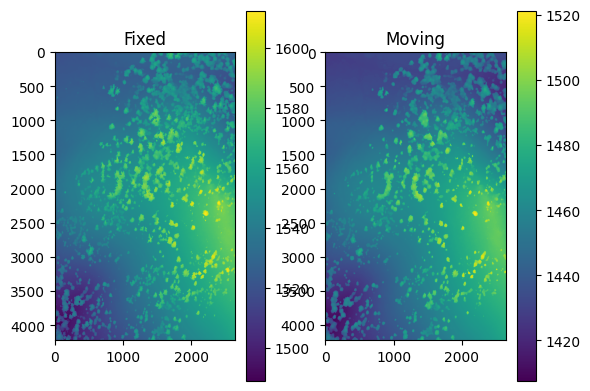

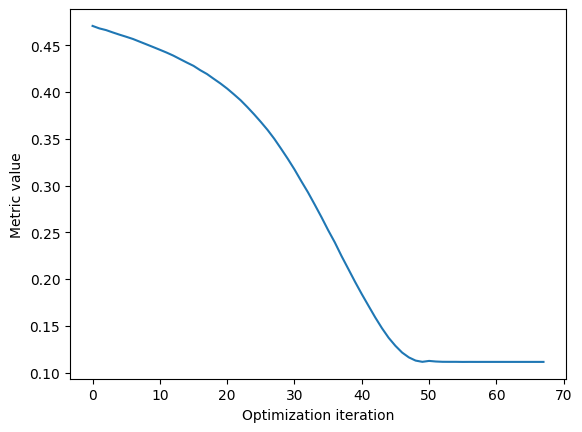

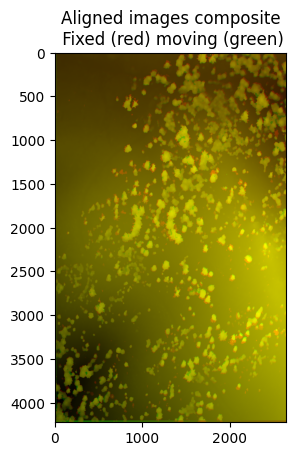

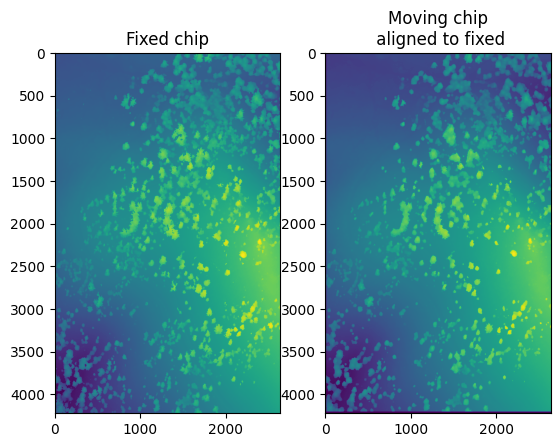

array([[ 2.53737746e-01,  0.00000000e+00,  6.59637255e+05],
       [ 0.00000000e+00, -2.53740219e-01,  4.44441343e+06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [1]:
import geopandas as gpd
from GDRT.raster.register_images import align_two_rasters
from GDRT.raster.registration_algorithms import sitk_intensity_registration

FIXED_FILENAME = "/ofo-share/str-disp_drone-data-partial/cross-site/dsms/chips.tif"
MOVING_FILENAME = "/ofo-share/scratch-david/organized-str-disp-MVMT-experiments/per_site_processing/chips/02_photogrammetry/exports/chips_80m_only/chips_80m_only_20240102T0531_dsm-mesh.tif"
OUTFILE = "/ofo-share/repos-david/geospatial-data-registration-toolkit/scratch/chips_80m_only_20240102T0531_dsm-mesh_georef.tif"
VECTOR_FILE = "/ofo-share/scratch-david/organized-str-disp-MVMT-experiments/field_ref/crowns_drone_w_field_data.geojson"

BUFFER_METERS = 50
TARGET_GSD = 0.1

roi = gpd.read_file(VECTOR_FILE).query("fire=='chips'")
roi = roi.dissolve().buffer(BUFFER_METERS)

align_two_rasters(
    FIXED_FILENAME,
    MOVING_FILENAME,
    output_filename=OUTFILE,
    region_of_interest=roi,
    target_GSD=TARGET_GSD,
    vis_chips=True,
    aligner_alg=sitk_intensity_registration,
    aligner_kwargs={"initial_translation": [60, 60]}, # Test robustness to artificial noise
    vis_kwargs={}
)